<a href="https://colab.research.google.com/github/dmunger27/dental-xray-segmentation/blob/main/Data_Preprocessing_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Exploration


*   [Pull in Images from S3](#pull)
*   [Display Images with and Without Masks](#display)
*   Preprocess Images
*   Image Augmentation
*   Image EDA



<a name="pull"></a>
## Pull in Images from S3

In [ ]:
#!pip install cloudpathlib
#!pip install boto3

In [1]:
import os
import pandas as pd
import numpy as np
from cloudpathlib import CloudPath
from cloudpathlib import S3Client
import matplotlib.pyplot as plt
import boto3


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# Set environment variables
key_data = pd.read_csv('rootkey.csv')
#os.environ['AWS_ACCESS_KEY'] = 'Set access key'
#os.environ['AWS_SECRET_KEY'] = 'Set secret key'

In [4]:
# Create files in local storage for x-ray data

def gatherS3Data(s3_path, folder_name):
  s3_client = S3Client(aws_access_key_id=os.getenv('AWS_ACCESS_KEY'), aws_secret_access_key=os.getenv('AWS_SECRET_KEY'))
  x_rays_images = s3_client.CloudPath(s3_path)
  x_rays_images.download_to(folder_name)

gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Dental X-rays tooth annotations/', 'annotation_images')
gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Dental X-rays/', 'original_images')
gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Numpy Annotations/', 'numpy_annotations')

<a name="display"></a>
## Display Images with and Without Masks

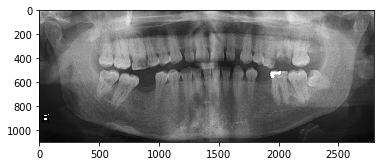

In [5]:
# Print some sample images without masks
sample_image = plt.imread('original_images/238 106.png')
plt.imshow(sample_image, 'gray', interpolation='none')
plt.show()
